# MODEL PREDIKSI UMR & PENGARUH INFLASI TERHADAP BESAR UMR DI INDONESIA 

### Import Library

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modsim import *

### BACA DATA UMR

In [185]:
# Baca file data_UMR.cv
data_UMR = pd.read_csv("data_UMR.csv")
data_UMR.rename(columns={"REGION": "Provinsi", "SALARY": "Gaji", "YEAR": "Tahun"}, inplace=True)

In [186]:
# Cek lima baris pertama untuk memahami struktur data
print(data_UMR.head())

         Provinsi    Gaji  Tahun
0            ACEH  128000   1997
1  SUMATERA UTARA  151000   1997
2  SUMATERA BARAT  119000   1997
3            RIAU  151500   1997
4           JAMBI  119500   1997


In [187]:
# Cek informasi dataset untuk mengetahui ada tidaknya missing values
print(data_UMR.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Provinsi  870 non-null    object
 1   Gaji      870 non-null    int64 
 2   Tahun     870 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 20.5+ KB
None


In [188]:
# Fungsi untuk menghitung growth rate
def calculate_growth_rate(df):
    df = df.sort_values('Tahun')
    df['Tingkat_Pertumbuhan'] = df['Gaji'].pct_change()
    return df

# Mengelompokkan data per region dan menghitung growth rate
data_growth_rate = data_UMR.groupby('Provinsi', as_index=False).apply(calculate_growth_rate).reset_index(drop=True)

# Menghapus baris pertama setiap region karena tidak memiliki data pertumbuhan tahun sebelumnya
data_growth_rate = data_growth_rate.dropna(subset=['Tingkat_Pertumbuhan'])

# Melihat hasil
print(data_growth_rate.head())

# Menghitung rata-rata growth rate per region
average_growth_rates = data_growth_rate.groupby('Provinsi')['Tingkat_Pertumbuhan'].mean()

# Menampilkan rata-rata growth rate
print(average_growth_rates)


  Provinsi    Gaji  Tahun  Tingkat_Pertumbuhan
1     ACEH  147000   1998             0.148438
2     ACEH  171000   1999             0.163265
3     ACEH  265000   2000             0.549708
4     ACEH  300000   2001             0.132075
5     ACEH  330000   2002             0.100000
Provinsi
ACEH                    0.142402
BALI                    0.125702
BANTEN                  0.120525
BENGKULU                0.127561
DI YOGYAKARTA           0.126324
DKI JAKARTA             0.144576
GORONTALO               0.147273
INDONESIA               0.128960
JAMBI                   0.136362
JAWA BARAT              0.120623
JAWA TENGAH             0.122328
JAWA TIMUR              0.114990
KALIMANTAN BARAT        0.128828
KALIMANTAN SELATAN      0.137412
KALIMANTAN TENGAH       0.133506
KALIMANTAN TIMUR        0.353548
KALIMANTAN UTARA        0.059135
KEP. BANGKA BELITUNG    0.148013
KEP. RIAU               0.119211
LAMPUNG                 0.127948
MALUKU                  0.128668
MALUKU UTARA    

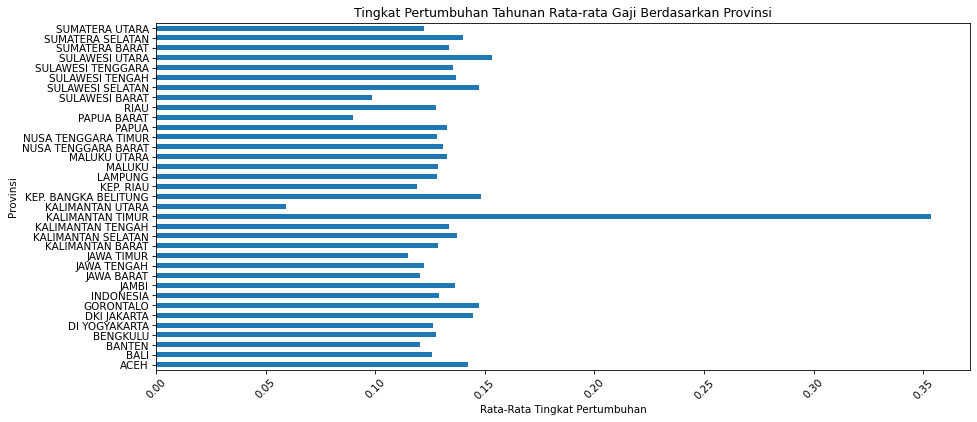

In [189]:
# Visualisasi
import matplotlib.pyplot as plt

# Plot average growth rate per region
average_growth_rates.plot(kind='barh', figsize=(14, 6))
plt.xlabel('Rata-Rata Tingkat Pertumbuhan')
plt.ylabel('Provinsi')
plt.title('Tingkat Pertumbuhan Tahunan Rata-rata Gaji Berdasarkan Provinsi')
plt.xticks(rotation=45)
plt.show()

In [190]:
# Baca file data_inflasi.cv
data_inflasi = pd.read_csv("data_inflasi.csv")
data_inflasi.drop(columns="GDP", inplace=True)
data_inflasi.rename(columns={"TAHUN": "Tahun", "INFLASI": "Inflasi"}, inplace=True)

In [191]:
# Cek lima baris pertama untuk memahami struktur data
print(data_inflasi.head())

   Tahun    Inflasi
0   1980  18.035430
1   1981  12.265909
2   1982   9.445424
3   1983  11.799741
4   1984  10.455035


In [192]:
# Cek informasi dataset untuk mengetahui ada tidaknya missing values
print(data_inflasi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tahun    43 non-null     int64  
 1   Inflasi  43 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 820.0 bytes
None


In [193]:
data_inflasi['Inflasi'] = data_inflasi['Inflasi'] / 100.0
print(data_inflasi.head())

   Tahun   Inflasi
0   1980  0.180354
1   1981  0.122659
2   1982  0.094454
3   1983  0.117997
4   1984  0.104550


In [194]:
# Menggabungkan data dengan operasi merge
data_merged = pd.merge(data_growth_rate, data_inflasi, on='Tahun', how='left')
print(data_merged)

           Provinsi     Gaji  Tahun  Tingkat_Pertumbuhan   Inflasi
0              ACEH   147000   1998             0.148438  0.584510
1              ACEH   171000   1999             0.163265  0.204778
2              ACEH   265000   2000             0.549708  0.036886
3              ACEH   300000   2001             0.132075  0.115001
4              ACEH   330000   2002             0.100000  0.119001
..              ...      ...    ...                  ...       ...
830  SUMATERA UTARA  2132189   2018             0.087101  0.031983
831  SUMATERA UTARA  2303403   2019             0.080300  0.030306
832  SUMATERA UTARA  2499423   2020             0.085100  0.019210
833  SUMATERA UTARA  2499423   2021             0.000000  0.015601
834  SUMATERA UTARA  2522609   2022             0.009277  0.042095

[835 rows x 5 columns]


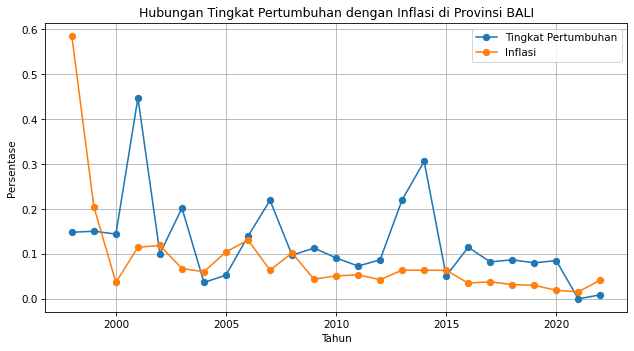

In [195]:
data_aceh = data_merged[data_merged['Provinsi'] == 'BALI']

# Membuat grafik
plt.figure(figsize=(10, 5))  # Ukuran grafik
plt.plot(data_aceh['Tahun'], data_aceh['Tingkat_Pertumbuhan'], marker='o', label='Tingkat Pertumbuhan')
plt.plot(data_aceh['Tahun'], data_aceh['Inflasi'], marker='o', label='Inflasi')

plt.title('Hubungan Tingkat Pertumbuhan dengan Inflasi di Provinsi BALI')
plt.xlabel('Tahun')
plt.ylabel('Persentase')
plt.legend()
plt.grid(True)
plt.show()

In [196]:
# Mendefinisikan fungsi untuk membuat state dan system
def make_state_and_system(data, provinsi):
    data_provinsi = data[data['Provinsi'] == provinsi]
    tahun_saat_ini = data_provinsi["Tahun"].max()
    data_terakhir = data_provinsi[data_provinsi["Tahun"] == tahun_saat_ini].iloc[0]

    # Membuat objek State
    state = State(
        nama_provinsi = provinsi,
        tahun_awal_prediksi = tahun_saat_ini + 1,
        tahun_akhir_prediksi = tahun_saat_ini + 10  # Misalnya kita ingin memprediksi 10 tahun ke depan
    )

    # Membuat objek System
    system = System(
        gaji_terkini = data_terakhir["Gaji"],
        inflasi_terkini = data_terakhir["Inflasi"],
        tingkat_pertumbuhan_terkini = data_terakhir["Tingkat_Pertumbuhan"]
    )

    return state, system

# Contoh penggunaan
state, system = make_state_and_system(data_merged, 'BALI')

print("State:")
print(state)
print("\nSystem:")
print(system)

State:
nama_provinsi           BALI
tahun_awal_prediksi     2023
tahun_akhir_prediksi    2032
Name: state, dtype: object

System:
System(gaji_terkini=2516971, inflasi_terkini=0.042094638340000004, tingkat_pertumbuhan_terkini=0.00921050521250999)


Time
2023    2625240
2024    2738166
2025    2855950
2026    2978800
2027    3106935
2028    3240581
2029    3379976
2030    3525367
2031    3677013
2032    3835182
Name: Quantity, dtype: int64


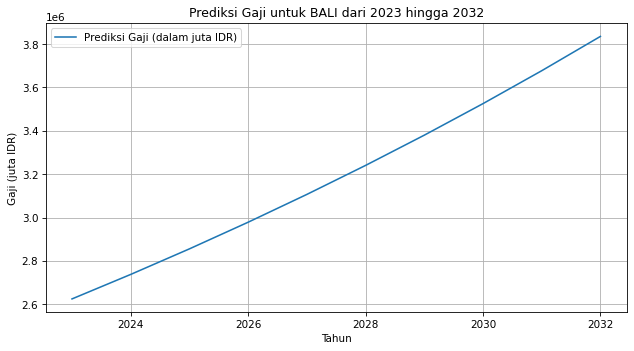

In [197]:
def update_func(state, system, kontribusi_tenaga_kerja):
    """Update Gaji berdasarkan inflasi dan growth rate dengan faktor kontribusi tenaga kerja terhadap pertumbuhan ekonomi provinsi atau kabupaten/kota."""
    system.gaji_terkini += system.gaji_terkini * (system.inflasi_terkini + (system.tingkat_pertumbuhan_terkini * kontribusi_tenaga_kerja))
    return int(system.gaji_terkini)

def run_simulation(state, system, kontribusi_tenaga_kerja):
    """Simulasi prediksi Gaji dalam juta Rupiah."""
    results = TimeSeries()
    # Konversi nilai awal ke juta Rupiah untuk konsistensi visualisasi
    # results[state.tahun_awal_prediksi] = system.gaji_terkini
    
    for tahun in range(state.tahun_awal_prediksi, state.tahun_akhir_prediksi + 1):
        prediksi_gaji = update_func(state, system, kontribusi_tenaga_kerja)
        # Simpan nilai Gaji dalam juta Rupiah
        results[tahun] = prediksi_gaji
        # Perbarui Gaji terkini di state dengan format juta Rupiah
        system.gaji_terkini = prediksi_gaji
        
    return results

# Misalkan state dan system sudah didefinisikan
state, system = make_state_and_system(data_merged, 'BALI')
results = run_simulation(state, system, 0.1)
print(results)

# Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(results, label='Prediksi Gaji (dalam juta IDR)')
plt.title('Prediksi Gaji untuk BALI dari {} hingga {}'.format(state.tahun_awal_prediksi, state.tahun_akhir_prediksi))
plt.xlabel('Tahun')
plt.ylabel('Gaji (juta IDR)')
plt.legend()
plt.grid(True)
plt.show()

Parameter
0.1    3835182
0.2    3869183
0.3    3903457
0.4    3938002
0.5    3972824
0.6    4007923
0.7    4043297
0.8    4078957
0.9    4114897
1.0    4151121
Name: Metric, dtype: int64


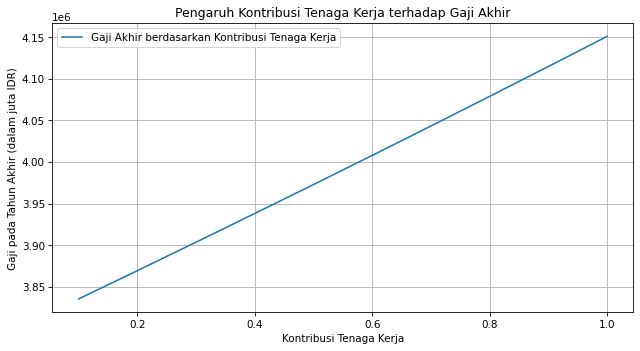

In [198]:
def sweep_growth_factor(state, system):
    sweep_results = SweepSeries()
    
    # Gunakan np.linspace untuk menghasilkan nilai kontribusi dari min_kontribusi hingga max_kontribusi dengan langkah
    kontribusi_tenaga_kerja = np.linspace(0.1, 1.0, 10)
    
    for kontribusi in kontribusi_tenaga_kerja:
        # Backup nilai gaji terkini untuk mengembalikan setelah simulasi setiap kontribusi
        initial_gaji = system.gaji_terkini
        
        # Jalankan simulasi dengan kontribusi tenaga kerja saat ini
        results = run_simulation(state, system, kontribusi)
        
        # Ambil nilai gaji terakhir dari hasil simulasi
        sweep_results[kontribusi] = results[state.tahun_akhir_prediksi]
        
        # Reset gaji terkini ke nilai awal sebelum simulasi berikutnya
        system.gaji_terkini = initial_gaji
    
    return sweep_results

state, system = make_state_and_system(data_merged, 'BALI')
sweep_results = sweep_growth_factor(state, system)
print(sweep_results)

plt.figure(figsize=(10, 5))
plt.plot(sweep_results, label='Gaji Akhir berdasarkan Kontribusi Tenaga Kerja')
plt.title('Pengaruh Kontribusi Tenaga Kerja terhadap Gaji Akhir')
plt.xlabel('Kontribusi Tenaga Kerja')
plt.ylabel('Gaji pada Tahun Akhir (dalam juta IDR)')
plt.legend()
plt.grid(True)
plt.show()